**Loan Prediction Practice Problem (Using Python)**

Importing Necessary Packages and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


Reading the data

In [2]:
train = pd.read_csv("train_ctrUa4K.csv")

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test = pd.read_csv("test_lAUu6dG.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train.shape

(614, 13)

In [6]:
test.shape

(367, 12)

Make Copy of data sets
- Making copy of the train and test data set in order to process data set and keep original data unchanged.

In [7]:
train_original = train.copy()
test_original = test.copy()

Understanding the Data

In [8]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [10]:
# Checking data types of each columns

train.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

- object/ Categorical variables = Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status. 
- Applicant Income is integer variable.
- Coapplicant income, Loan amount, loan amount term, and credit history are numeric variables having decimal values.

In [11]:
train.shape,       test.shape

((614, 13), (367, 12))

- We have 614 rows and 13 columns in Train dataset and
- We have 367 rows and 12 columns in Test dataset

Univariate Analysis

## Target Variable - Loan_Status

- Its a categorical variable, lets check frequency table, percentage distribution and bar plot

**a. Frequency Table:** 
- using # value_counts()
- It will give the count of each category in that variable.

In [12]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

**b. Percentage distribution:**

- normalize can be set to true to print proportions instead of numbers

In [13]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

**c. Bar plot:**

<AxesSubplot:>

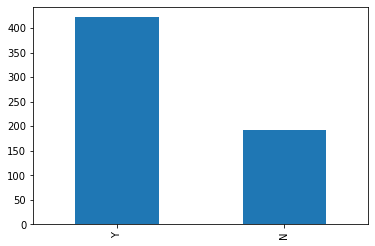

In [14]:
train['Loan_Status'].value_counts().plot.bar()

- Loan of 422 (around 69%) people out of 614 was approved

* Visualizing each individual variable separately. 
- Categorical features = Gender, Married, Self_Employed, Credit_History, Loan_Status
- Ordinal features = Dependents, Education, Property_Area
- Numerical features = Applicant_Income, Coapplicant_Income, Loan_Amount, Loan_Amount_Term

* Lets visualize categorical and Ordinal Features first.

Independent Variable (Categorical)

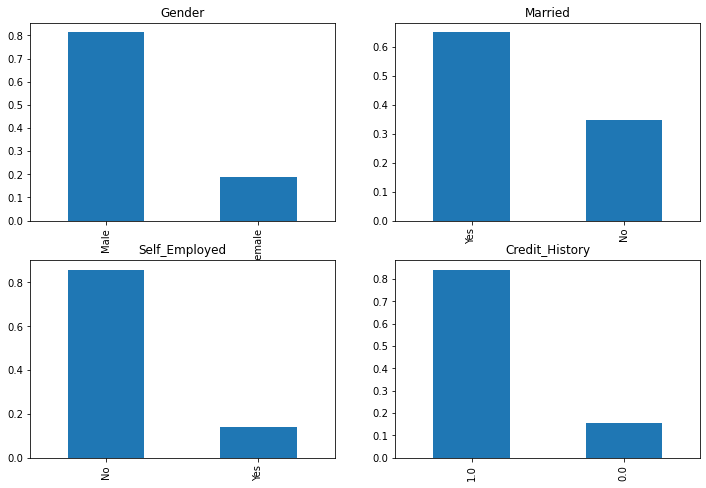

In [15]:
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize= (12,8), title= 'Gender')
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
plt.show()


Inference:
- 80% of the applicants are male
- Around 65% of the applicants are Married
- Around 15% of the applicants are Self employed
- Around 85% of the applicants have repaid their debts.

Independent Variables (Ordinal)

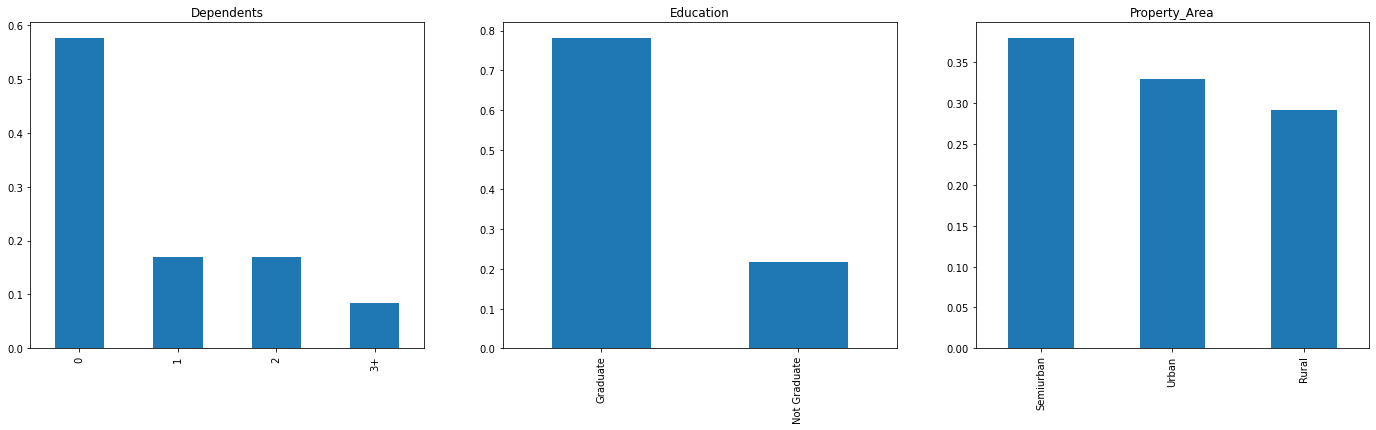

In [16]:
plt.figure(1) 
plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize= (24,6), title= 'Dependents')
plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')
plt.show()

Inferences:
- Most of the Applicants don't have the dependents
- Around 80% of the applicants are Graduates
- Most of the applicants are from the semi-urban area.

Independent variables (Numerical)


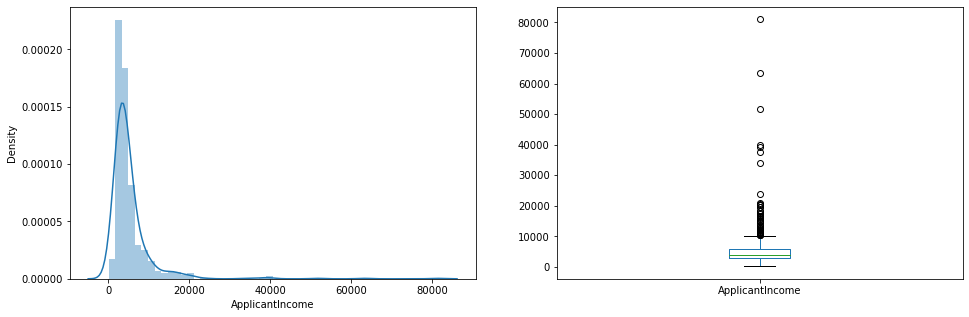

In [17]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Inference:
- Most of the data is distributed towards the left which means the data is not normally distributed.
- Box plot shows presence of lot of outliers (extreme values). This can be attributed to the income disparity in the society. 

- Part of this can be driven by the fact that we are looking at the people with different levels of Education.

- Hence, segregate them by Education. 

Text(0.5, 0.98, ' ')

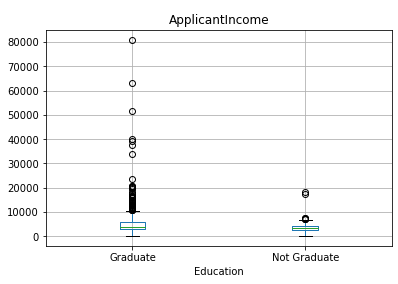

In [18]:
train.boxplot(column='ApplicantIncome', by='Education') 
plt.suptitle(" ")

Inference:
- Above plot shows that there are higher number of graduates with very high income, which are appearing to be outliers.


* Coapplicant Income Distribution:

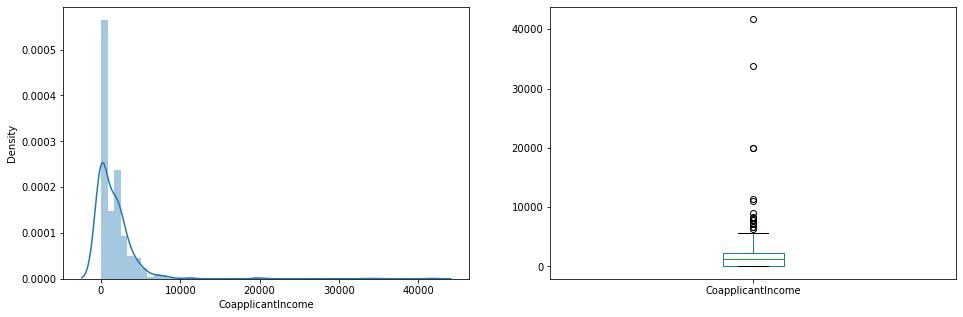

In [19]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Inferences:
- The plot shows the similar distribution as per the Applicant Income.
- Majority of the Coapplicant income ranges from 0 to 5000.
- There is presence of lot of outliers in the coapplicant income.
- It is not normally distributed.


* Loan Amount Distribution

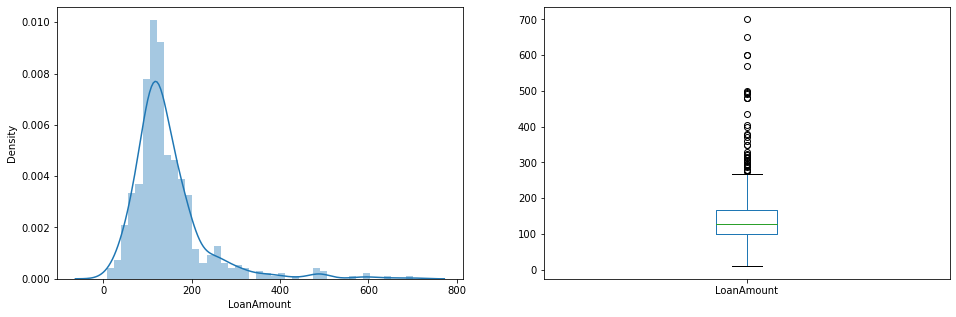

In [20]:
plt.figure(1) 
plt.subplot(121)
df=train.dropna()
sns.distplot(train['LoanAmount']);
plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

Inference:
- There are lot of outliers present this variable.
- Distribution is fairly normal.

# Bivariate Analysis

Categorical Independent Variable vs Target Variable

<AxesSubplot:xlabel='Gender'>

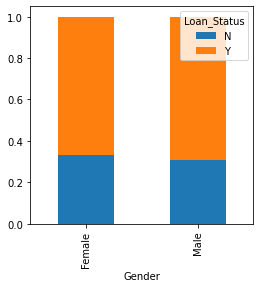

In [21]:
# Plotting Stacked bar plot to get proportion of Approved and unapproved loans

Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Inference:
- It shows that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

* Visualizing remaining categorical vs target variable plots-

- Married
- Dependents
- Education
- self_employed
- Credit_History
- Property Area

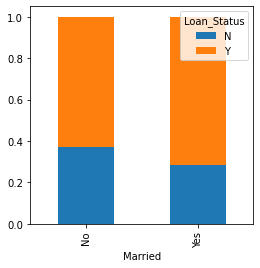

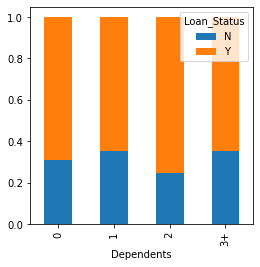

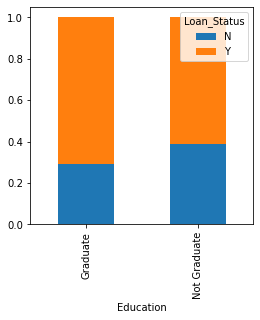

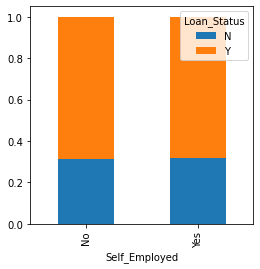

In [22]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Inference:
- Proportion of Married applicants is higher for the approved loans
- Distribution of applicants with 1 or 3+ dependents is similar across both the categories of loan status
- There is nothing significant we can infer from Self employed vs loan status plot

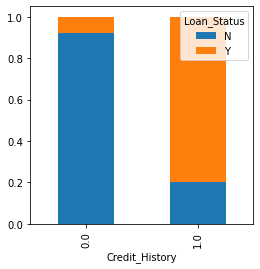

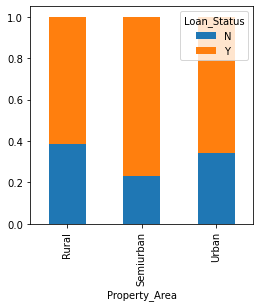

In [23]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Inference:
- It seems that applicant with credit history as 1 are more likely to get their loans approved.
- Proportion of loans getting approved in semi-urban area is higher as compared to rural and urban areas.

Numerical independent variable vs Target variable

<AxesSubplot:xlabel='Loan_Status'>

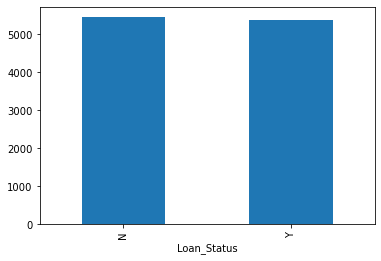

In [24]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Inference:
- y-axis represents the mean applicant income.
- we don't see any change in mean income. 


Hence, lets make bins for applicant income variable based on the values in it and analyze the corresponding loan status for each bin.


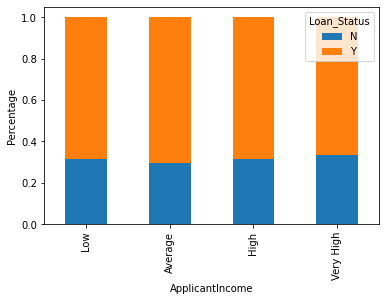

In [25]:
bins=[0,2500, 4000, 6000, 81000]
group=['Low', 'Average', 'High', 'Very High']
train['Income_bin']=pd.cut(train['ApplicantIncome'], bins, labels=group)

Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')



Inference:
- It can be inferred that Applicant Income does not affect the chances of the loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

* Analyzing the coapplicant income and loan amount variable in similar manner.

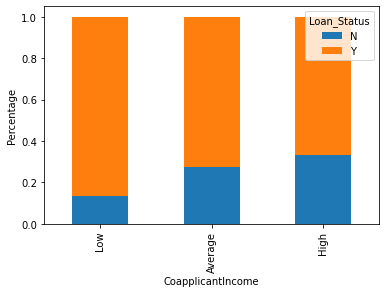

In [26]:
bins=[0, 1000, 3000, 42000] 
group=['Low', 'Average', 'High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'], bins, labels=group)

Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')



Inference:
- It shows that if coapplicant income is less the chances of loan approval are high. but this doesn't look right.
- the possible reason behind this may be that most of the applicants don't have any coapplicant, so the coapplicant income for such applicants is 0 (zero)
- hence, the loan approval is not dependent on it. 
- So we can make a new variable in which we will comabine the applicants income and coapplicants income to visualize the combined effect if income on loan approval.



* Combine the Applicants Income and Coapplicant Income to see the combined effect of Total income on loan Status.

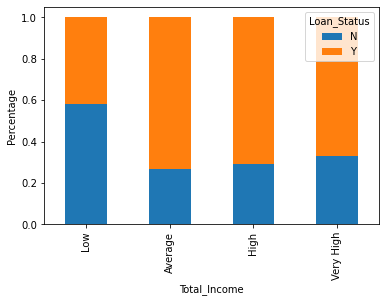

In [27]:
train['Total_Income']=train['ApplicantIncome'] + train['CoapplicantIncome']

bins=[0,2500, 4000, 6000, 81000]
group=['Low', 'Average', 'High', 'Very High']
train['Total_Income_bin']=pd.cut(train['Total_Income'], bins, labels=group)

Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

Inference:
- We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, high and very High income.

* Visualizing the loan Amount Variable

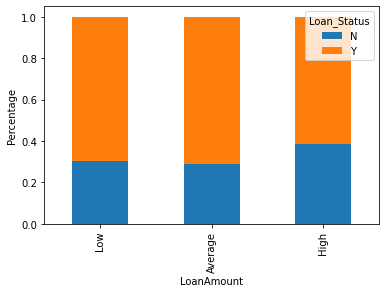

In [28]:
bins=[0, 100, 200, 700] 
group=['Low', 'Average', 'High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'], bins, labels=group)

LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

Inference:
- It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount.
- which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.


* Lets drop the bins which we created for the exploration part.
- we will change the 3 plus independents variable to 3, to make it numerical variable.

- We will also convert the target variable's categories into 0 and 1.
- so that we can find its correlation with numeric variables.

- Another reason to do this is few models like logistic regression takes only numeric values as input.
- we will replace N with 0 and Y with 1.

In [29]:
traina=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

* Correlation between all the numerical variables:
- We will use the heat map to visualize the correlation.
- Heatmaps visualize the data through variations in coloring.
- The variables with darker color means their correlation is more.

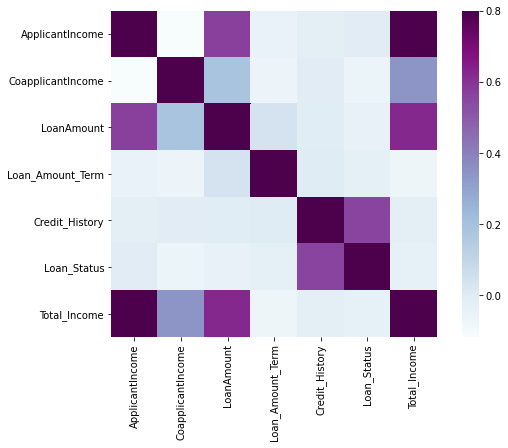

In [30]:
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

Inference - 
- we see that the most correlated variables are (Applicantincome - loanAmount) And (Creadit_history - Loan_Status).
- LoanAmount is also correlated with CoapplicantIncome.

Missing Value and Outlier Treatment

- Missing data and outilers can have adverse effect on the model performance. hence, we have to impute missing values and treat outliers.

Missing Value Imputation

- Listing out feature wise count of missing values.

In [31]:
train.isnull().sum()

Loan_ID                     0
Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_Income_bin    273
Total_Income                0
Total_Income_bin            0
LoanAmount_bin             22
dtype: int64

Inference:
- There are missing values in Gender, married, Dependents, Self_Employed, LoanAmount, LoanAmount_Term and Credit_History features.

* We will treat the missing values in all the features one by one. 
* **Methods used to fill the missing values** are-

- **Mean or Median** : For numerical variables imputation is done using Mean or median. 
- **Mode** : For categorical variables imputation is done using mode.

- There are very less missing values in Gender, Married, Dependents, Credit_history and Self_Employed features.
- Hence, we can fill them by using Mode of the features.

In [32]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)


- Checking the value_counts of the Loan_Amount_Term variable to fill the missing values.

In [33]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [34]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Inference:
- In this variable the value of 360 is repeating the most.
- The missing values in this column will be replaced using mode of this variable.

* LoanAmount Variable is Numeric variable, so we can use mean or median for missing values imputation. 
- Loan amount variable have outliers so using mean will not be proper approach as it is highly affected by presence of outliers.
- We will use median to fill null values.

In [35]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

* Checking whether null values filled or not :

In [36]:
train.isnull().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History              0
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_Income_bin    273
Total_Income                0
Total_Income_bin            0
LoanAmount_bin             22
dtype: int64

Inference:
- All the missing values are filled in the train dataset.
- Now fill all the missing values in test dataset.

In [37]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)


* Univariate analysis shows that LoanAmount contains outliers
- and presence of outliers affects the distribution of the data.
- Outliers also have effect on the mean and standard deviation and hence affecting the distribution.
- So its necessary to remove the outliers from dataset

- Because of these outliers in data the loan amount is at the left and the right tail is longer.
- It means the data is Right Skewed.
- To remove the skewness log transformation can be used.
- Log transformation does not affect the smaller values much, But they reduces the larger values.
- So we get the distribution similar to normal distribution.

**Visualizing the effects of log transformation:**
- We will be doing similar changes to the test files simultaneously.

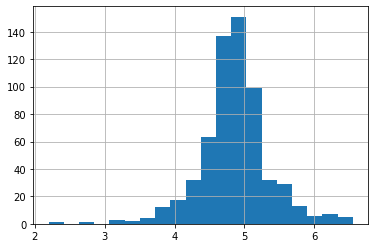

In [38]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

Inference:
- Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let's build a logistic regression model and make predictions for the best dataset.

# Evaluation Metrics for Classification Problem

# Logistic  Regression Model

In [39]:
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

In [40]:
X = train.drop('Loan_Status', 1)
y = train.Loan_Status

In [41]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [44]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(class_weight= None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100,
                  multi_class='ovr', n_jobs=1, penalty = '12', random_state=1, solver='liblinear', verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, penalty='12', random_state=1,
                   solver='liblinear')

In [45]:
pred_y = model.predict(x_test)

In [46]:
accuracy_score=(y_test, pred_y)
accuracy_score

(438    0
 155    1
 242    1
 335    1
 582    1
       ..
 170    1
 3      1
 545    1
 306    1
 489    0
 Name: Loan_Status, Length: 185, dtype: int64,
 array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64))

In [49]:
accuracy_score

(438    0
 155    1
 242    1
 335    1
 582    1
       ..
 170    1
 3      1
 545    1
 306    1
 489    0
 Name: Loan_Status, Length: 185, dtype: int64,
 array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64))

In [50]:
pred_test = model.predict(test)

ValueError: X has 21 features per sample; expecting 36

Note : getting value error***

# Logistic Regression Using Stratified K-folds Stratified 